In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression

In [4]:
path = os.path.abspath(os.path.join(os.getcwd(), "../dataset_covid/sursaud/sursaud-covid19-quotidien-2020-03-31-19h00-departement.csv"))
path = os.path.abspath(os.path.join(os.getcwd(), "../dataset_covid/data_gouv/sursaud-covid19-quotidien-2020-04-01-19h00-departement.csv"))
path = os.path.abspath(os.path.join(os.getcwd(), "../dataset_covid/data_gouv/sursaud-covid19-quotidien-2020-04-03-19h00-departement.csv"))

path = os.path.abspath(os.path.join(os.getcwd(), "../dataset_covid/data_gouv/sursaud-covid19-quotidien-2020-04-04-19h00-departement.csv"))
df = pd.read_csv(path, sep=",")
df.fillna(0)

,dep,date_de_passage,sursaud_cl_age_corona,nbre_pass_corona,nbre_pass_tot,nbre_hospit_corona,nbre_pass_corona_h,nbre_pass_corona_f,nbre_pass_tot_h,nbre_pass_tot_f,nbre_hospit_corona_h,nbre_hospit_corona_f,nbre_acte_corona,nbre_acte_tot,nbre_acte_corona_h,nbre_acte_corona_f,nbre_acte_tot_h,nbre_acte_tot_f
0,01,2020-02-24,0,0.0,357.0,0.0,0.0,0.0,202.0,155.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01,2020-02-24,A,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,01,2020-02-24,B,0.0,155.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,01,2020-02-24,C,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,01,2020-02-24,D,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,976,2020-04-02,A,1.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23630,976,2020-04-02,B,2.0,26.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23631,976,2020-04-02,C,3.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23632,976,2020-04-02,D,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.head()

,dep,date_de_passage,sursaud_cl_age_corona,nbre_pass_corona,nbre_pass_tot,nbre_hospit_corona,nbre_pass_corona_h,nbre_pass_corona_f,nbre_pass_tot_h,nbre_pass_tot_f,nbre_hospit_corona_h,nbre_hospit_corona_f,nbre_acte_corona,nbre_acte_tot,nbre_acte_corona_h,nbre_acte_corona_f,nbre_acte_tot_h,nbre_acte_tot_f
0,01,2020-02-24,0,0.0,357.0,0.0,0.0,0.0,202.0,155.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,01,2020-02-24,A,0.0,73.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01,2020-02-24,B,0.0,155.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01,2020-02-24,C,0.0,61.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01,2020-02-24,D,0.0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
import datetime
import numpy as np
dict_data = []
dict_data = df.to_dict()
my_data = {k: [dict_data[k][k1] for k1 in sorted(dict_data[k], key=lambda
x: float(x))] for k in dict_data}
my_data["date"] = [int(datetime.datetime.strptime(x, "%Y-%m-%d").timestamp()/(24*3600)) 
                   for x in my_data["date_de_passage"]]


In [7]:
print(my_data.keys())

dict_keys(['dep', 'date_de_passage', 'sursaud_cl_age_corona', 'nbre_pass_corona', 'nbre_pass_tot', 'nbre_hospit_corona', 'nbre_pass_corona_h', 'nbre_pass_corona_f', 'nbre_pass_tot_h', 'nbre_pass_tot_f', 'nbre_hospit_corona_h', 'nbre_hospit_corona_f', 'nbre_acte_corona', 'nbre_acte_tot', 'nbre_acte_corona_h', 'nbre_acte_corona_f', 'nbre_acte_tot_h', 'nbre_acte_tot_f', 'date'])


In [8]:
indexes_per_department = {}
index_age = {}
index_days = {}
for k in range(len(my_data["dep"])):
    dep = my_data["dep"][k]
    age = my_data["sursaud_cl_age_corona"][k]
    day = my_data["date"][k]
    if dep not in indexes_per_department:
        indexes_per_department[dep] = []
    indexes_per_department[dep] += [k]
    if age not in index_age:
        index_age[age] = []
    index_age[age] += [k]
    if day not in index_days:
        index_days[day] = []
    index_days[day] += [k]

In [9]:
print(index_age.keys())

dict_keys(['0', 'A', 'B', 'C', 'D', 'E'])


In [10]:
datas = ["nbre_pass_corona", "nbre_pass_tot", 
         "nbre_hospit_corona", "date"]
import numpy as np
for d in datas:
    my_data[d+"_np"] = np.array(my_data[d])
indexes = [i for i in indexes_per_department["31"] if i in index_age["0"]]
dates_plot = [datetime.datetime.fromtimestamp((my_data["date_np"][ind]+1)*(24*3600)) for ind in indexes]

In [11]:
def nice_date(ax, dates, indexes):
    ax.set_xticks(dates)
    ax.set_xticklabels([str(date.day)+'/'+str(date.month)+"/2020" for date in dates])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

In [12]:
for department in indexes_per_department:
    # departement_of_interest = '68'
    sex = 0
    indexes = [i for i in indexes_per_department[department] if i in index_age["0"]]
    try:
        fig, ax = plt.subplots(1, figsize=(8, 8))
        for data_of_interest in ["nbre_pass_corona", 
                                 "nbre_pass_tot", 
                                 "nbre_hospit_corona"]:
            ax.plot(dates_plot, 
                    my_data[data_of_interest+"_np"][indexes],                  
                    label=data_of_interest)
        ax.set_xlabel('date')
        ax.set_ylabel('nb people')
        ax.set_title("Evolution of sursaud  : "+str(department))
        ax.legend()
        nice_date(ax, dates_plot, indexes)
        fig.savefig("../images_mess/"+str(department)+"_sursaud_data.png")
    except:
        pass
    plt.close('all')
    #ax.set_yscale('log')
    #plt.show()

In [13]:
datas = ["nbre_pass_corona", "nbre_pass_tot", "nbre_hospit_corona"]
aggregated_data = {}
sex = 0
for d in datas:
    k = list(index_days.keys())[0]
    aggregated_data[d] = np.array([np.sum(np.nan_to_num(my_data[d+"_np"][[p for p in index_days[k] if p in index_age["0"]]]))                                     for k in sorted(index_days)])
    print(d, aggregated_data[d])
for d in datas:
    aggregated_data["ratio_"+d] = (aggregated_data[d][1:]-aggregated_data[d][:-1])/aggregated_data[d][:-1]
    print("growth ratio", d,  aggregated_data["ratio_"+d])
for d in datas:
    aggregated_data["gratio_"+d] = (aggregated_data[d][2:]-aggregated_data[d][1:-1])/(
                                    aggregated_data[d][1:-1]-aggregated_data[d][:-2])
    print("ratio delta_n+1/delta_n", d,  aggregated_data["gratio_"+d])

nbre_pass_corona [1.000e+00 1.000e+00 0.000e+00 1.900e+01 3.100e+01 3.700e+01 3.900e+01
 1.110e+02 1.510e+02 2.450e+02 3.150e+02 3.420e+02 3.190e+02 2.950e+02
 5.160e+02 5.710e+02 7.880e+02 9.890e+02 1.242e+03 1.176e+03 1.346e+03
 1.944e+03 2.013e+03 2.355e+03 2.364e+03 2.856e+03 2.667e+03 2.780e+03
 4.490e+03 4.336e+03 4.414e+03 4.587e+03 5.693e+03 4.903e+03 3.909e+03
 5.260e+03 4.309e+03 3.706e+03 3.368e+03]
nbre_pass_tot [48476. 42628. 42020. 41680. 41805. 40825. 39145. 44864. 40704. 40135.
 40855. 40904. 40132. 39459. 44976. 40836. 40463. 41209. 37245. 35602.
 31658. 29895. 25245. 25425. 23962. 24128. 22939. 20753. 25500. 23453.
 23184. 22659. 25458. 24766. 19748. 23960. 22338. 21038. 19251.]
nbre_hospit_corona [0.000e+00 0.000e+00 0.000e+00 1.000e+00 6.000e+00 5.000e+00 2.100e+01
 5.100e+01 5.300e+01 5.600e+01 7.100e+01 1.230e+02 1.180e+02 1.290e+02
 1.690e+02 2.050e+02 2.300e+02 2.990e+02 4.180e+02 3.770e+02 4.190e+02
 5.770e+02 6.840e+02 7.130e+02 8.810e+02 1.083e+03 1.034e+03 1

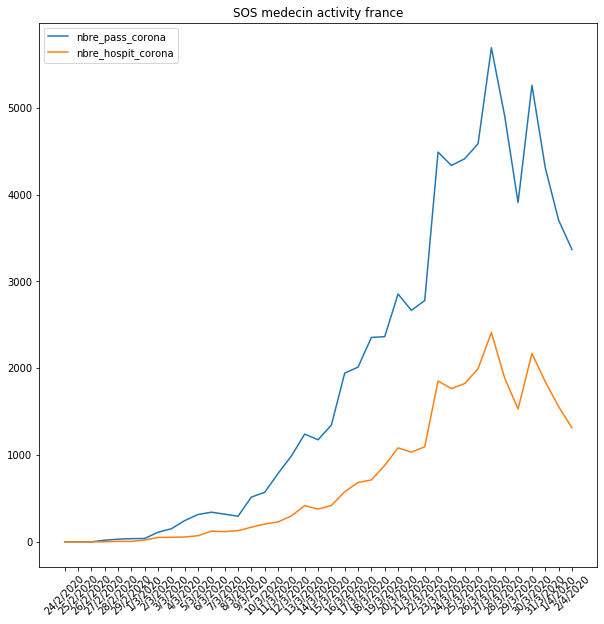

In [14]:
fig, ax = plt.subplots(1, figsize=(10,10))
indexes = [i for i in indexes_per_department["31"] if i in index_age["0"]]
for d in ["nbre_pass_corona", "nbre_hospit_corona"]:
    ax.plot(dates_plot, aggregated_data[d], label=d)
ax.set_title("SOS medecin activity france")
ax.legend()
fig.savefig("nb_passage_sursaud.png")
nice_date(ax, dates_plot, [])